<a href="https://colab.research.google.com/github/MOOwuttichai/BSC_DPDM2023/blob/main/Classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification**

In [218]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preparation

In [219]:
import pandas as pd
import numpy as np

## Metadata

Number of Instances: 690

Number of Attributes: 15 + class attribute

Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)

Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

Class Distribution
  
    +: 307 (44.5%)
    -: 383 (55.5%)


In [220]:
col_name = ['a1','a2','a3','a4','a5','a6','a7','a8',
            'a9','a10','a11','a12','a13','a14','a15','a16']

In [221]:
credit = pd.read_csv('/content/drive/MyDrive/BSC-dpdm23_flie/crx.data', header = None, names=col_name) # (1) Set header = None because there is no column names in the data file

print(credit.shape)
credit.head()

(690, 16)


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [222]:
credit = credit[['a3','a8','a9','a10','a11','a12','a13','a15','a16']]

In [223]:
credit

,a3,a8,a9,a10,a11,a12,a13,a15,a16
0,0.000,1.25,t,t,1,f,g,0,+
1,4.460,3.04,t,t,6,f,g,560,+
2,0.500,1.50,t,f,0,f,g,824,+
3,1.540,3.75,t,t,5,t,g,3,+
4,5.625,1.71,t,f,0,f,s,0,+
...,...,...,...,...,...,...,...,...,...
685,10.085,1.25,f,f,0,f,g,0,-
686,0.750,2.00,f,t,2,t,g,394,-
687,13.500,2.00,f,t,1,t,g,1,-
688,0.205,0.04,f,f,0,f,g,750,-


In [224]:
credit.isnull().any()

a3     False
a8     False
a9     False
a10    False
a11    False
a12    False
a13    False
a15    False
a16    False
dtype: bool

Preprocessing

In [225]:
credit = credit.replace({'t':1,'f':0,'g':1, 'p':2, 's':3,'+':1,'-':0})

In [226]:
credit= credit[['a9','a10','a12','a13','a16']] #ไม่เอาค่า continuous.

In [227]:
credit

,a9,a10,a12,a13,a16
0,1,1,0,1,1
1,1,1,0,1,1
2,1,0,0,1,1
3,1,1,1,1,1
4,1,0,0,3,1
...,...,...,...,...,...
685,0,0,0,1,0
686,0,1,1,1,0
687,0,1,1,1,0
688,0,0,0,1,0


## divide data into train and test


In [228]:
import numpy as np

In [229]:
np.random.seed(seed=1)

In [230]:
a = np.random.randint(2, size=len(credit))

In [231]:
a

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [232]:
train = credit[a == 1] # ข้อมูล ฝึก
train.shape

(324, 5)

In [233]:
test = credit[a == 0] # ข้อสอบ
test.shape

(366, 5)

## Start Decision Tree

### import

In [234]:
from sklearn.tree import DecisionTreeClassifier

### define

In [235]:
Dtree1 = DecisionTreeClassifier(random_state=0)

In [236]:
train.to_excel('KOK.xlsx')

### train

In [237]:
X_train = train.iloc[:,:-1]

In [238]:
y_train = train.iloc[:,-1]

In [239]:
Dtree1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [240]:
from sklearn import tree

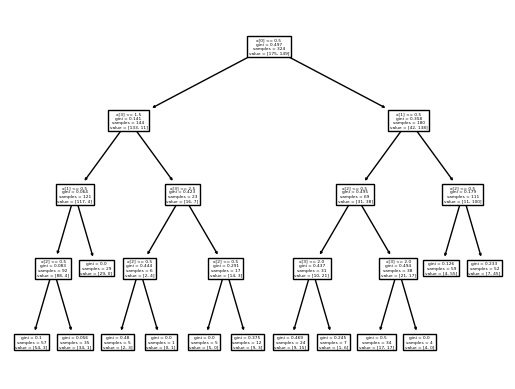

In [241]:
tree.plot_tree(Dtree1);

### test

In [242]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [243]:
y_predict = Dtree1.predict(X_test)

In [244]:
from sklearn.metrics import accuracy_score

In [245]:
y_test

2      1
3      1
9      1
10     1
12     1
      ..
685    0
686    0
687    0
688    0
689    0
Name: a16, Length: 366, dtype: int64

In [246]:
accuracy_score(y_test, y_predict)

0.8387978142076503

In [247]:
y_predict

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Set parameter

### Import

In [248]:
from sklearn.tree import DecisionTreeClassifier

### Define

In [249]:
Dtree2 = DecisionTreeClassifier(random_state=0,max_depth=2)#max_depth=ชั้นต้นไม้

### Train

In [250]:
Dtree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

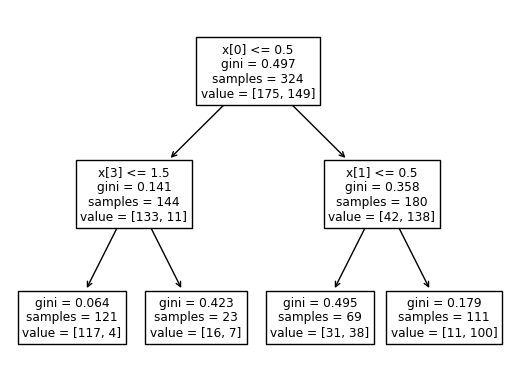

In [251]:
tree.plot_tree(Dtree2);

### Test

In [252]:
y_predict2 = Dtree2.predict(X_test)

In [253]:
accuracy_score(y_test, y_predict2)

0.8715846994535519

#HW3
ให้เเต่ละกลุ่ม สร้างต้นไม้ของตัวเอง โดยปรับเปลี่ยน parameters ให้เเละมาอธิบาย parameter ของตัวเอง ว่ามันคืออะไร
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* เเถว 1 : criterion,max_leaf_nodes
* เเถว 2 : min_samples_split,splitter
* เเถว 3 : min_samples_leaf,max_features
* เเถว 4 : min_impurity_decrease
* เเถว 5 : min_weight_fraction_leaf

##เเถว 2 : min_samples_split,splitte

### min_samples_split

In [301]:
DtreeHW2 = DecisionTreeClassifier(random_state=0,max_depth=3,min_samples_split=323)

In [302]:
DtreeHW2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=323, random_state=0)

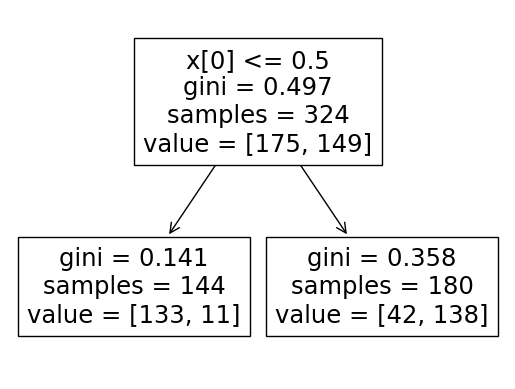

In [303]:
tree.plot_tree(DtreeHW2);

In [304]:
y_predictHW2 = DtreeHW2.predict(X_test)

In [305]:
accuracy_score(y_test, y_predictHW2)

0.8715846994535519

### splitte

In [259]:
from matplotlib import pyplot as plt

In [260]:
DtreeHW2_1 = DecisionTreeClassifier(random_state=0,criterion="gini",splitter="random")

In [261]:
DtreeHW2_1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0, splitter='random')

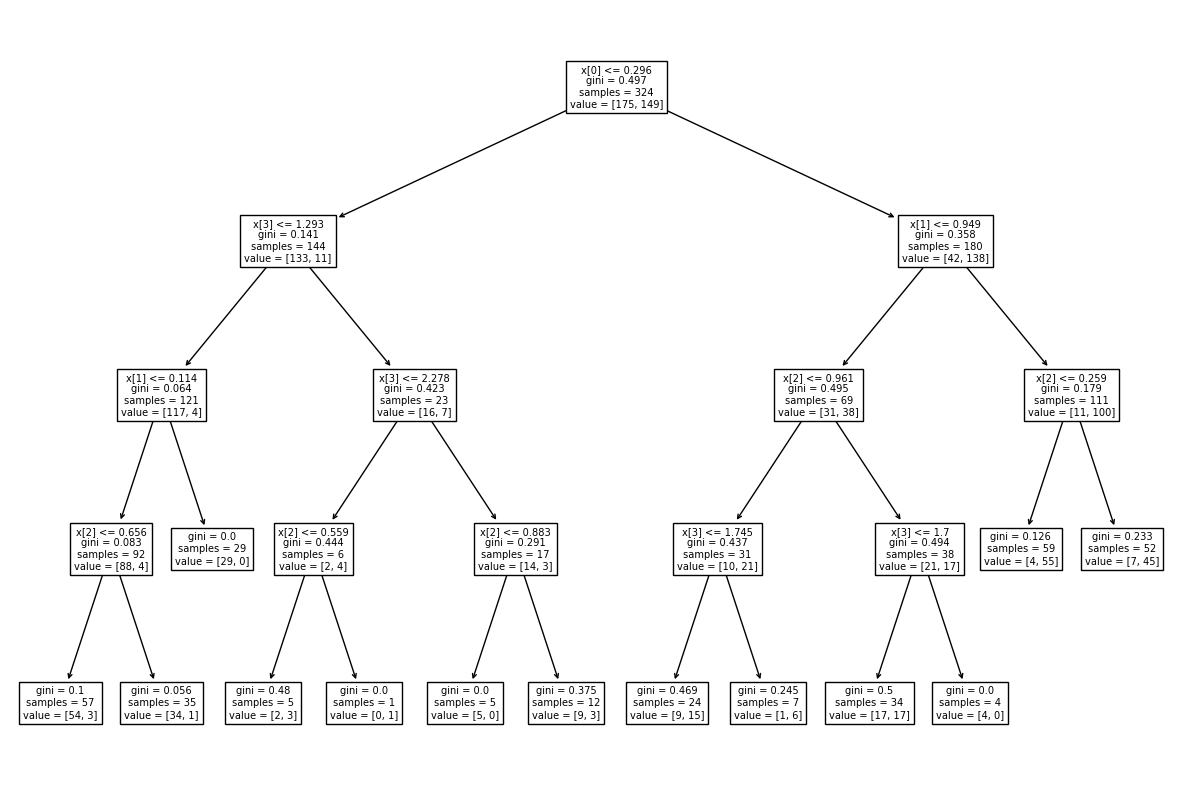

In [262]:
_,ax = plt.subplots(figsize=(15,10))
tree.plot_tree(DtreeHW2_1);


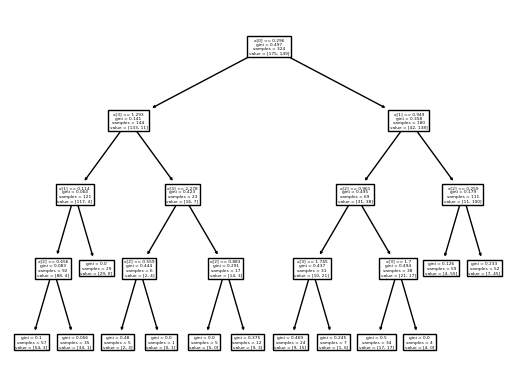

In [263]:
tree.plot_tree(DtreeHW2_1);


In [264]:
y_predictHW2_1 = DtreeHW2_1.predict(X_test)

In [265]:
accuracy_score(y_test, y_predictHW2_1)

0.8387978142076503

### comp

In [266]:
DtreeHW2_1 = DecisionTreeClassifier(random_state=0,criterion="entropy",splitter="best")

In [267]:
DtreeHW2_1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

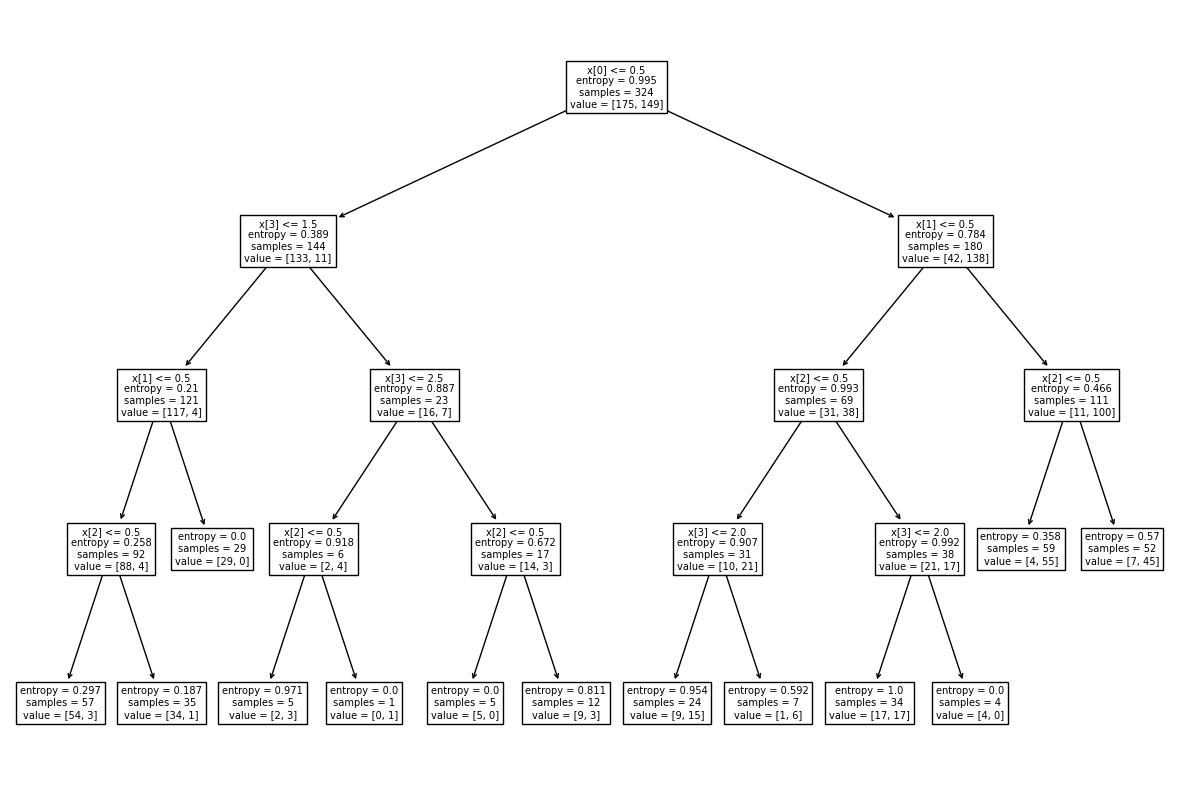

In [268]:
_,ax = plt.subplots(figsize=(15,10))
tree.plot_tree(DtreeHW2_1);

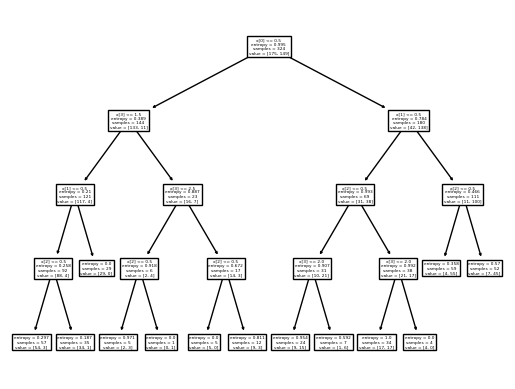

In [269]:
tree.plot_tree(DtreeHW2_1);

In [270]:
y_predictHW2_1 = DtreeHW2_1.predict(X_test)

In [271]:
accuracy_score(y_test, y_predictHW2_1)

0.8387978142076503

In [272]:
features = []
tresholds = []
for random in range(1000):
    DtreeHW2_1 = DecisionTreeClassifier(criterion="gini", splitter='random', random_state=random)
    DtreeHW2_1.fit(X_train,y_train)
    features.append(DtreeHW2_1.tree_.feature[0])
    tresholds.append(DtreeHW2_1.tree_.threshold[0])

In [273]:
tresholds

[0.2956086934058036,
 0.5562514586170444,
 0.41543057254302806,
 0.6950718163024037,
 0.9562486209702904,
 0.4831219997644061,
 0.6531869311133339,
 0.40006362339484675,
 0.9375310442119515,
 0.7606348687599576,
 0.3187221094587455,
 0.3826353412040674,
 0.4823753053706024,
 0.156490429843073,
 0.25450938858767475,
 0.765371177701918,
 0.052173835249698645,
 0.4881041354910024,
 0.718499259426491,
 0.8528569777742293,
 0.860846154326967,
 0.6828114062933305,
 0.14450672974088544,
 0.97669658762249,
 0.6423920526366644,
 0.7398915270994844,
 0.8280140882488406,
 0.5007804899945765,
 0.21853608601658422,
 0.5416990209099366,
 0.2866991065846286,
 0.2613512865553383,
 0.775592095579762,
 0.023379222500780235,
 0.7888748533040634,
 0.45934873188815484,
 0.22712036791589127,
 0.2704623123958997,
 0.34032199501074945,
 0.5971321308040676,
 0.16414819898276972,
 0.30931930956864695,
 0.7270890258844425,
 0.12375853169884464,
 0.5622064958150529,
 0.8959428867771956,
 0.3700207636552028,
 0.54

In [274]:
features

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


# ~~HW5~~

Build a decision tree model which has better accuracy than 0.86 and describe about parameters you set.